In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

In [16]:
ad = sc.read('../data/h5ad/20200114/fetal_skin.mast_cells.doublet_removed_processed.20200114.h5ad')

Only considering the two last: ['.20200114', '.h5ad'].
Only considering the two last: ['.20200114', '.h5ad'].


In [17]:
ss.lib.leiden(ad, use_graph='neighbors_hm', restrict_to=('leiden_hm_r0_4', ('4',)), resolution=0.05, key_added='hm_split')

['leiden_hm_split']

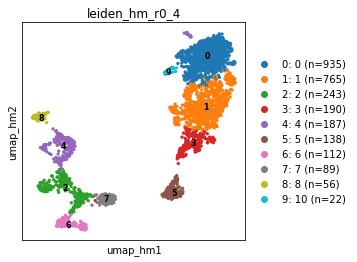

In [18]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_r0_4')

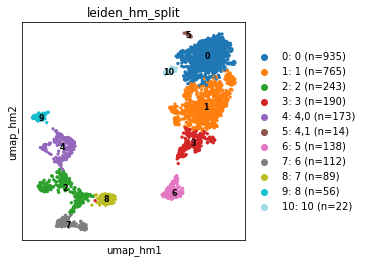

In [19]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_split', palette='tab20')

In [20]:
ad.obs['rachel_annot3'] = ss.lib.regroup(ad, groupby='leiden_hm_split', regroups={
    'Eo/baso/mast cell progenitor?': '5',
    'Mast cell (earliest)': '3',
    'Mast cell (medium)': '1',
    'Mast cell (most mature)': '0',
    'HSC': '6',
    'MEMP - Early erythroid': '7',
    'MEMP - Megak': '2',
    'Megakaryocyte': '4,0',
    'Fibroblast doublet': '8',
    'Lymphoid doublet': '10',
    'Unknown': '4,1',
})

In [21]:
ad.obs.rachel_annot3.value_counts()

Mast cell (most mature)          935
Mast cell (medium)               765
MEMP - Megak                     243
Mast cell (earliest)             190
Megakaryocyte                    173
Eo/baso/mast cell progenitor?    138
HSC                              112
MEMP - Early erythroid            89
Fibroblast doublet                56
Lymphoid doublet                  22
Unknown                           14
Name: rachel_annot3, dtype: int64

In [14]:
deg1 = ss.lib.diffexp(ad, groupby='rachel_annot3', key_added='rachel_annot3', filter_params='sc_default', method='logreg')

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
deg1.loc[deg1.cluster == 'Unknown', :]

,cluster,ref,rank,genes,scores
142356,Unknown,rest,4,HIST1H4H,0.035001
142372,Unknown,rest,20,BBC3,0.027004
142376,Unknown,rest,24,HSBP1L1,0.026282
142377,Unknown,rest,25,HIST1H2BC,0.026044
142387,Unknown,rest,35,HIST1H2BN,0.022715
142408,Unknown,rest,56,HIST2H2BF,0.019676
142430,Unknown,rest,78,HIST1H4B,0.017263
142445,Unknown,rest,93,HIST4H4,0.016111
142450,Unknown,rest,98,HIST1H2BJ,0.015981
142455,Unknown,rest,103,HIST1H3H,0.015738


In [10]:
deg2 = ss.lib.diffexp(ad, groupby='rachel_annot3', groups=['Megakaryocyte', 'Unknown'], reference='Megakaryocyte', key_added='rachel_annot3_unknown', filter_params='sc_default')

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [11]:
deg2

,cluster,ref,rank,genes,scores,logfoldchanges,pvals,pvals_adj
5,Unknown,Megakaryocyte,5,HIST1H2BN,4.108119,5.435123,0.001022,0.056996
6,Unknown,Megakaryocyte,6,HSBP1L1,3.881819,5.402826,0.001588,0.074938
9,Unknown,Megakaryocyte,9,HIST1H4H,3.575288,6.421857,0.002996,0.112009
11,Unknown,Megakaryocyte,11,HIST1H2BC,3.231868,4.091408,0.005368,0.157113
12,Unknown,Megakaryocyte,12,HIST4H4,3.179482,6.707133,0.006765,0.178877
15,Unknown,Megakaryocyte,15,HIST2H2BF,3.001981,6.922021,0.010107,0.226782
17,Unknown,Megakaryocyte,17,HIST1H4B,2.945234,6.287843,0.010960,0.239396
22,Unknown,Megakaryocyte,22,BBC3,2.873721,3.630575,0.011550,0.246918
24,Unknown,Megakaryocyte,24,HIST1H2BG,2.863172,5.305265,0.012303,0.253688
59,Unknown,Megakaryocyte,59,HIST1H2BJ,2.154289,2.798634,0.045121,0.478582


In [22]:
ad1 = ad[~ad.obs.rachel_annot3.isin(['Fibroblast doublet', 'Lymphoid doublet', 'Unknown']), :].copy()

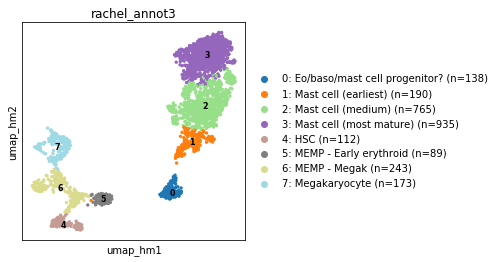

In [23]:
ss.lib.clear_colors(ad1)
ss.lib.plot_embedding(ad1, basis='umap_hm', groupby='rachel_annot3', palette='tab20')

In [24]:
ss.lib.clear_colors(ad1)

In [25]:
ad1.write('fetal_skin.mast_cells.doublet_removed_processed.20200403.h5ad', compression='lzf')